# Final Project Phase 2

### Alicia Chen (ac2596), Stephanie Chow (sac342), Michelle Wang (mqw4)


## Introduction

What is the context of the work? What research question are you trying to answer? What are your main findings? 

Context of the work

Grouping artists with their songs and combine

1. Trends between boy groups and girl groups songs popularity?
2. Song popularity by group
3. Soloists vs groups in terms of song views

## Data Description

Answer the following questions:
- What are the observations (rows) and the attributes (columns)?
- Why was this dataset created?
- Who funded the creation of the dataset?
- What processes might have influenced what data was observed and recorded and what was not?
- What preprocessing was done, and how did the data come to be in the form that you are using?
- If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 


The dataset we plan to use is the view count and likes for music videos (MVs) of big kpop groups. The observations are the different groups that have released at least one music video as of April 2020. The attributes are the artist, the song, the view count, the liked count, as well as the average like and view count for the corresponding kpop idols. The original dataset was created as a way for the user to showcase the trends of different idols and videos as they are released. The datasets we will be using are created by a site called aoimirai.net and is also accompanied with some aggregate data from the MCountdown chart (https://www.mwave.me/en/mcountdown/mcountdown-chart_) which holds the current top trending K-Pop songs. 

We created our corresponding dataset as a way to figure out if there are any trends among groups that tend to be popular, or if there are any unexpected values, such as artist who may have a large overall view count, but a low view count per video. These videos and counts are taken from Youtube, so the counts from other large media distribution sites are not included. This may influence the data because Youtube is the main platform used for "International Fans" (those who reside outside of South Korea) whereas Naver is the primary video distribution method in South Korea. Also. popularity of a group may not be based on views and like count of a Youtube video, as there may some songs or artist who rank differently in other sites, such as iTunes and Spotify. The raw source data can be found in the aoimirai site, including http://kpop.aoimirai.net/artists.html?options=1111&cols=101100011&hideone=1&ord=3D&limit=0 and http://kpop.aoimirai.net/mvs.html

The accompanying data from MCountdown could provide some interesting links between all-time popular song/music videos and those that are currently trending. A note to consider is that many of the current trending songs may have an overall smaller average view count and likes due to being released much later than their counterparts.

Dataset 1 filtered the artist data by removing the associated indexing that was attached to artist names presented. In addition, both datasets 1 and 2 used the alternative method of decimals as indicators for thousands and commas as indicators for decimals. As a result, we switched the two to stay in line with American standardization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from bs4 import BeautifulSoup
import re

In [3]:
# Dataset 1
# Source: kpop_vids_yt.htm

with open("kpop_mvs_1000_entries.htm", encoding = "utf8") as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [4]:
for tr in soup.find_all("tr", class_ = "clickable"):
    td_list = tr.find("td").get_text()

print(td_list)

1000. Flash(dance)


In [5]:
def period_to_comma(old_array):
    new_array = []
    [new_array.append(i.replace(".", ",")) for i in old_array]
    return new_array

def comma_to_period(old_array):
    new_array = []
    [new_array.append(i.replace(",", ".")) for i in old_array]
    return new_array

def no_comma(data):
    return re.sub(",", "", data)

In [6]:
data = []
typeofartist = []
song_raw = []
artist = []

for tr in soup.find_all("tr", class_ = "clickable"):
    [data.append(td.get_text()) for td in tr.find_all("td")]
    typeofartist.append(tr.div['title'])

# indexing each value position
song_index, artist_index = 0, 1

while artist_index < len(data):
    song_raw.append(data[song_index])
    artist.append(re.sub(" ", "", data[artist_index]))
    song_index += 9
    artist_index += 9
    
arrlikes_raw=[]
arrviews_raw=[]
arrdays_raw = []

for views, likes, days in zip(soup.find_all("td", class_='c0'), soup.find_all("td", class_='c3'), soup.find_all("td", class_='c6')):
    arrlikes_raw.append(likes.get_text()[:])
    arrviews_raw.append(views.get_text()[:])
    arrdays_raw.append(days.get_text()[:])
    
arrlikes = period_to_comma(arrlikes_raw)
arrviews = period_to_comma(arrviews_raw)
arrdays = period_to_comma(arrdays_raw)

In [7]:
# cleaning song name data without numbers
songs = []
for song in song_raw:
    replace_num = re.sub('\d+. ', '', song)
    songs.append(replace_num.strip())

# cleaning likes data and splitting into two parts
likes_total_raw = []
likes_ratio_raw = []

for likes in arrlikes:
    likes_total_raw.append(re.sub(' \(\d+,\d+%\)', "", likes))
    ratio = re.findall('(\d+,\d+%)', likes)
    likes_ratio_raw.append(ratio[0])

likes_total = period_to_comma(likes_total_raw)
likes_ratio = comma_to_period(likes_ratio_raw)

days = []
for day in arrdays:
    new_days = re.sub(" days", "", day)
    days.append(no_comma(new_days))
    
arryears = np.array(days, dtype="float")
arryears = arryears/365

In [8]:
df = pd.DataFrame({"Song Title": songs, 
                   "Artist": artist, 
                   "Type of Artist": typeofartist, 
                   "MV Views": arrviews, 
                   "Likes": likes_total, 
                   "Likes Ratio": likes_ratio,
                   "Days Old" : arrdays_raw,
                   "Years Old" : arryears
                  })
categories = ["Song Title", "Artist", "Type of Artist", "Likes", "Likes Ratio", "MV Views", "Days Old", "Years Old"]
df = df.reindex(columns = categories)
df.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old
0,Gangnam Style,PSY,male soloist,"17,848,966",88.2%,"3,612,465,662",2.859 days,7.832877
1,Boy with luv,BTS,male group,"14,942,987",94.3%,"776,602,125",397 days,1.087671
2,DNA,BTS,male group,"13,257,145",94.9%,"978,195,463",968 days,2.652055
3,Kill this Love,Blackpink,female group,"12,920,236",93.9%,"826,027,265",405 days,1.109589
4,Ddu-du Ddu-du,Blackpink,female group,"12,544,634",94.5%,"1,144,730,047",698 days,1.912329


In [9]:
# Dataset 2

with open("kpop_artists_300_entries.htm", encoding = "utf8") as file_reader:
    soup2 = BeautifulSoup(file_reader, "lxml")

In [10]:
def strip_numbers(data, lst):
    counter = 0
    while counter < len(data):
        replace_num = re.sub('\d+. ', '', data[counter])
        no_space = re.sub(' ', '', replace_num)
        lst.append(no_space)
        counter += 9

data = []
typeofartist = []
artist = []

for tr in soup2.find_all("tr", class_ = "clickable"):
    [data.append(td.get_text()) for td in tr.find_all("td")]
    typeofartist.append(tr.div['title'])
    
strip_numbers(data, artist)

In [11]:
arrlikes_raw=[]
arrsales_raw=[]
arrviews_raw=[]

for views, likes, sales in zip(soup2.find_all("td", class_='c0'), soup2.find_all("td", class_='c7'), soup2.find_all("td", class_='c8')):
    arrlikes_raw.append(likes.get_text()[:])
    arrsales_raw.append(sales.get_text()[:-3])
    arrviews_raw.append(views.get_text()[:])

arrlikes = period_to_comma(arrlikes_raw)
arrsales = period_to_comma(arrsales_raw)
arrviews = period_to_comma(arrviews_raw)

need = pd.DataFrame({"Artist": artist, 
                    "Type of Artist": typeofartist, 
                    "Total Views": arrviews, 
                    "Likes/MV": arrlikes, 
                    "Sales": arrsales})
categories = [ "Artist", "Type of Artist", "Likes/MV", "Sales", "Total Views"]
need = need.reindex(columns = categories)
need.head()

,Artist,Type of Artist,Likes/MV,Sales,Total Views
0,BTS(방탄소년단),male group,"2,400,603","21,047,066","11,914,564,663"
1,Blackpink(블랙핑크),female group,"3,495,869","652,585","6,236,964,281"
2,Twice(트와이스),female group,"951,944","4,572,592","5,119,889,077"
3,EXO(엑소),male group,"1,285,821","10,273,845","2,690,343,428"
4,GOT7(갓세븐),male group,"534,887","3,386,454","2,077,803,857"


In [12]:
new_data = []
for tr in soup2.find_all("tr", class_ = "clickable"):  
    row = tr.find('td')
    small = row.small
    if type(small) != type(None):
        small.decompose()
    [new_data.append(td.get_text()) for td in tr.find_all("td")]

artists = []
strip_numbers(new_data, artists)

new = need.copy()
new['Artist'] = artists
new.head()

,Artist,Type of Artist,Likes/MV,Sales,Total Views
0,BTS,male group,"2,400,603","21,047,066","11,914,564,663"
1,Blackpink,female group,"3,495,869","652,585","6,236,964,281"
2,Twice,female group,"951,944","4,572,592","5,119,889,077"
3,EXO,male group,"1,285,821","10,273,845","2,690,343,428"
4,GOT7,male group,"534,887","3,386,454","2,077,803,857"


In [13]:
combined_data = pd.merge(df, new)
combined_data.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,Gangnam Style,PSY,male soloist,"17,848,966",88.2%,"3,612,465,662",2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
1,Gentleman,PSY,male soloist,"6,007,998",87.3%,"1,312,037,506",2.587 days,7.087671,"1,997,592","518,974","6,054,464,700"
2,Daddy,PSY,male soloist,"3,799,519",93.8%,"493,121,830",1.626 days,4.454795,"1,997,592","518,974","6,054,464,700"
3,New Face,PSY,male soloist,"1,581,019",95.0%,"205,665,596",1.099 days,3.010959,"1,997,592","518,974","6,054,464,700"
4,I Luv it,PSY,male soloist,"973,795",94.7%,"101,822,612",1.099 days,3.010959,"1,997,592","518,974","6,054,464,700"


In [14]:
replace_likes = []
likes_column = combined_data['Likes']
for like in likes_column:
    replace_likes.append(no_comma(like))
    
replace_views = []
views_column = combined_data['MV Views']
for view in views_column:
    replace_views.append(no_comma(view))

In [15]:
replace_likes = np.array(replace_likes, dtype="int64")
replace_views = np.array(replace_views, dtype="int64")
combined_data['Likes'] = replace_likes
combined_data['MV Views'] = replace_views
sorted_byLikes = combined_data.sort_values("Likes", axis=0, ascending=False)
sorted_byLikes.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,Gangnam Style,PSY,male soloist,17848966,88.2%,3612465662,2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
7,Boy with luv,BTS,male group,14942987,94.3%,776602125,397 days,1.087671,"2,400,603","21,047,066","11,914,564,663"
8,DNA,BTS,male group,13257145,94.9%,978195463,968 days,2.652055,"2,400,603","21,047,066","11,914,564,663"
103,Kill this Love,Blackpink,female group,12920236,93.9%,826027265,405 days,1.109589,"3,495,869","652,585","6,236,964,281"
104,Ddu-du Ddu-du,Blackpink,female group,12544634,94.5%,1144730047,698 days,1.912329,"3,495,869","652,585","6,236,964,281"


In [16]:
sorted_byViews = combined_data.sort_values("MV Views", axis=0, ascending=False)
sorted_byViews.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,Gangnam Style,PSY,male soloist,17848966,88.2%,3612465662,2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
1,Gentleman,PSY,male soloist,6007998,87.3%,1312037506,2.587 days,7.087671,"1,997,592","518,974","6,054,464,700"
104,Ddu-du Ddu-du,Blackpink,female group,12544634,94.5%,1144730047,698 days,1.912329,"3,495,869","652,585","6,236,964,281"
8,DNA,BTS,male group,13257145,94.9%,978195463,968 days,2.652055,"2,400,603","21,047,066","11,914,564,663"
105,Boombayah,Blackpink,female group,7561192,95.3%,849999809,1.374 days,3.764384,"3,495,869","652,585","6,236,964,281"


In [17]:
sorted_byRatio = combined_data.sort_values("Likes Ratio", ascending=False)
sorted_byRatio.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
456,Miroh(dance),StrayKids,male group,389016,99.8%,5001411,402 days,1.101370,"479,271","1,026,466","654,638,916"
476,Boom(alternate),NCTDREAM,male group,303676,99.8%,2949506,278 days,0.761644,"433,529","1,048,154","353,880,465"
433,Coming Home,NCTU,male group,358959,99.8%,3907620,152 days,0.416438,"672,391",0,"376,266,781"
454,N/S,StrayKids,male group,428638,99.8%,7447947,539 days,1.476712,"479,271","1,026,466","654,638,916"
455,TMT,StrayKids,male group,405295,99.8%,5523195,317 days,0.868493,"479,271","1,026,466","654,638,916"


In [18]:
# dict = {Artist Name: {Total Ratio: number of likes ratios added together, 
#                       Count: number of songs/ videos that were accounted for in the total ratio}}

In [19]:
sorted_byViews_ascending = combined_data.sort_values("MV Views", axis=0, ascending=True)
sorted_byViews_ascending.head()

,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
249,Feel Special(dance),Twice,female group,346964,99.5%,1925263,1 days,0.002740,"951,944","4,572,592","5,119,889,077"
476,Boom(alternate),NCTDREAM,male group,303676,99.8%,2949506,278 days,0.761644,"433,529","1,048,154","353,880,465"
317,Intro: Ten x Taemin x Kai,SuperM,male group,388295,99.2%,3083818,228 days,0.624658,"1,086,772","167,640","71,750,651"
621,Rewind170205,CL,female soloist,291815,99.7%,3491012,161 days,0.441096,"377,459",0,"162,583,514"
710,Zombie,Day6,male group,611106,99.6%,3505162,2 days,0.005479,"328,304","364,587","261,306,790"


Female groups
The slope is [[0.00953676]]
The intercept is [177261.15103184]
The score is 0.8468218983198252
The mean number of MV views is 85767907.44202898
The standard deviation of MV Views is 133385682.00802305
The mean number of Likes is 995209.2753623188
The standard deviation of Likes is 1382337.5969678676
Male groups
The slope is [[0.01310889]]
The intercept is [409048.68383956]
The score is 0.7275438145676861
The mean number of MV views is 60958127.31481481
The standard deviation of MV Views is 107085789.3417437
The mean number of Likes is 1208142.2818930042
The standard deviation of Likes is 1645766.813207023
Coed groups
The slope is [[0.00283901]]
The intercept is [473630.77085088]
The score is 0.6426204161845945
The mean number of MV views is 64761759.86486486
The standard deviation of MV Views is 124320794.22458468
The mean number of Likes is 657490.1891891892
The standard deviation of Likes is 440284.86467310373


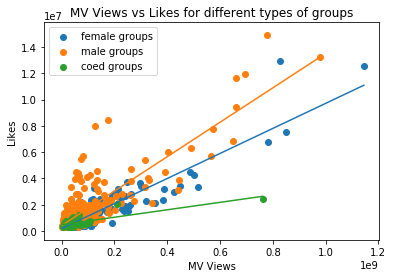

In [28]:
female_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "female group"]
male_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "male group"]
coed_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "coed group"]

plt.scatter(female_groups['MV Views'], female_groups['Likes'], label="female groups")
plt.scatter(male_groups['MV Views'], male_groups['Likes'], label="male groups")
plt.scatter(coed_groups['MV Views'], coed_groups['Likes'], label="coed groups")

model = LinearRegression()
model.fit(female_groups[['MV Views']], female_groups[['Likes']])
y_pred = model.predict(female_groups[['MV Views']])
plt.plot(female_groups['MV Views'], y_pred)

print("Female groups")
print("The slope is " + str(model.coef_))
print("The intercept is " + str(model.intercept_))
print("The score is " + str(model.score(female_groups[['MV Views']], female_groups[['Likes']])))
print("The mean number of MV views is " + str(female_groups['MV Views'].mean()))
print("The standard deviation of MV Views is " + str(female_groups['MV Views'].std()))
print("The mean number of Likes is " + str(female_groups['Likes'].mean()))
print("The standard deviation of Likes is " + str(female_groups['Likes'].std()))


model = LinearRegression()
model.fit(male_groups[['MV Views']], male_groups[['Likes']])
y_pred = model.predict(male_groups[['MV Views']])
plt.plot(male_groups['MV Views'], y_pred)

print("Male groups")
print("The slope is " + str(model.coef_))
print("The intercept is " + str(model.intercept_))
print("The score is " + str(model.score(male_groups[['MV Views']], male_groups[['Likes']])))
print("The mean number of MV views is " + str(male_groups['MV Views'].mean()))
print("The standard deviation of MV Views is " + str(male_groups['MV Views'].std()))
print("The mean number of Likes is " + str(male_groups['Likes'].mean()))
print("The standard deviation of Likes is " + str(male_groups['Likes'].std()))



model = LinearRegression()
model.fit(coed_groups[['MV Views']], coed_groups[['Likes']])
y_pred = model.predict(coed_groups[['MV Views']])
plt.plot(coed_groups['MV Views'], y_pred)

print("Coed groups")
print("The slope is " + str(model.coef_))
print("The intercept is " + str(model.intercept_))
print("The score is " + str(model.score(coed_groups[['MV Views']], coed_groups[['Likes']])))
print("The mean number of MV views is " + str(coed_groups['MV Views'].mean()))
print("The standard deviation of MV Views is " + str(coed_groups['MV Views'].std()))
print("The mean number of Likes is " + str(coed_groups['Likes'].mean()))
print("The standard deviation of Likes is " + str(coed_groups['Likes'].std()))

plt.legend()
plt.xlabel("MV Views")
plt.ylabel("Likes")
plt.title("MV Views vs Likes for different types of groups")
plt.show()

Groups
The slope is [[0.01081864]]
The intercept is [354982.34210651]
The score is 0.6989947976557568
The mean number of MV views is 69704352.24530663
The standard deviation of MV Views is 118046465.81297329
The mean number of Likes is 1109088.9186483105
The standard deviation of Likes is 1527526.840712832
Soloists
The slope is [[0.00492451]]
The intercept is [613980.43037063]
The score is 0.7718930590116762
The mean number of MV views is 72609416.38121547
The standard deviation of MV Views is 287344310.4429597
The mean number of Likes is 971546.2928176796
The standard deviation of Likes is 1610597.9336381939


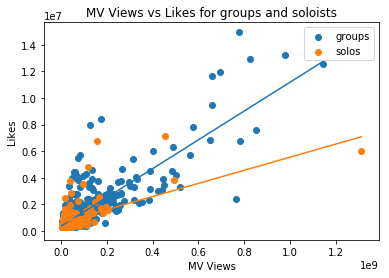

In [31]:
groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'].str.contains("group")]
solos=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'].str.contains("soloist")]

plt.scatter(groups['MV Views'], groups['Likes'], label="groups")
plt.scatter(solos['MV Views'][:-1], solos['Likes'][:-1], label="solos")

model = LinearRegression()
model.fit(groups[['MV Views']], groups[['Likes']])
y_pred = model.predict(groups[['MV Views']])
plt.plot(groups['MV Views'], y_pred)

print("Groups")
print("The slope is " + str(model.coef_))
print("The intercept is " + str(model.intercept_))
print("The score is " + str(model.score(groups[['MV Views']], groups[['Likes']])))
print("The mean number of MV views is " + str(groups['MV Views'].mean()))
print("The standard deviation of MV Views is " + str(groups['MV Views'].std()))
print("The mean number of Likes is " + str(groups['Likes'].mean()))
print("The standard deviation of Likes is " + str(groups['Likes'].std()))

model = LinearRegression()
model.fit(solos[['MV Views']], solos[['Likes']])
y_pred = model.predict(solos[['MV Views']])
plt.plot(solos['MV Views'][:-1], y_pred[:-1])

print("Soloists")
print("The slope is " + str(model.coef_))
print("The intercept is " + str(model.intercept_))
print("The score is " + str(model.score(solos[['MV Views']], solos[['Likes']])))
print("The mean number of MV views is " + str(solos['MV Views'].mean()))
print("The standard deviation of MV Views is " + str(solos['MV Views'].std()))
print("The mean number of Likes is " + str(solos['Likes'].mean()))
print("The standard deviation of Likes is " + str(solos['Likes'].std()))

plt.legend()
plt.xlabel("MV Views")
plt.ylabel("Likes")
plt.title("MV Views vs Likes for groups and soloists")
plt.show()

## Data Analysis

- Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data.
- Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.



## Evaluation of Significance

Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

## Conclusion

What did you find over the course of your data analysis, and how confident are you in these conclusions? Interpret these results in the wider context of the real-life application from where your data hails.

## Source Code

Provide a link to your Github repository (or other file hosting site) that has all of your project code (if applicable). For example, you might include web scraping code or data filtering and aggregation code.

## Acknowledgements

Recognize any people or online resources that you found helpful. These can be tutorials, software packages, Stack Overflow questions, peers, and data sources. Showing gratitude is a great way to feel happier! But it also has the nice side-effect of reassuring us that you're not passing off someone else's work as your own. Crossover with other courses is permitted and encouraged, but it must be clearly stated, and it must be obvious what parts were and were not done for 2950. Copying without attribution robs you of the chance to learn, and wastes our time investigating.